# Continuous Wavelet Transform - Scalograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100
T_points = 1000

delta_T = T/T_points
fs = 1/delta_T

t = np.linspace(0,T,T_points)

print(f'Sampling time = {delta_T} s')
print(f'Sampling Frequency = {fs} Hz = {2*np.pi*fs : .4f} rad/s')
print()
print(f'Maximum frequency resolution = {1/T} Hz')

Sampling time = 0.1 s
Sampling Frequency = 10.0 Hz =  62.8319 rad/s

Maximum frequency resolution = 0.01 Hz


## Sinusoidal Stationary Signal

Signal Frequency = 4 Hz =  25.1327 rad/s
Normalized frequency = 0.4


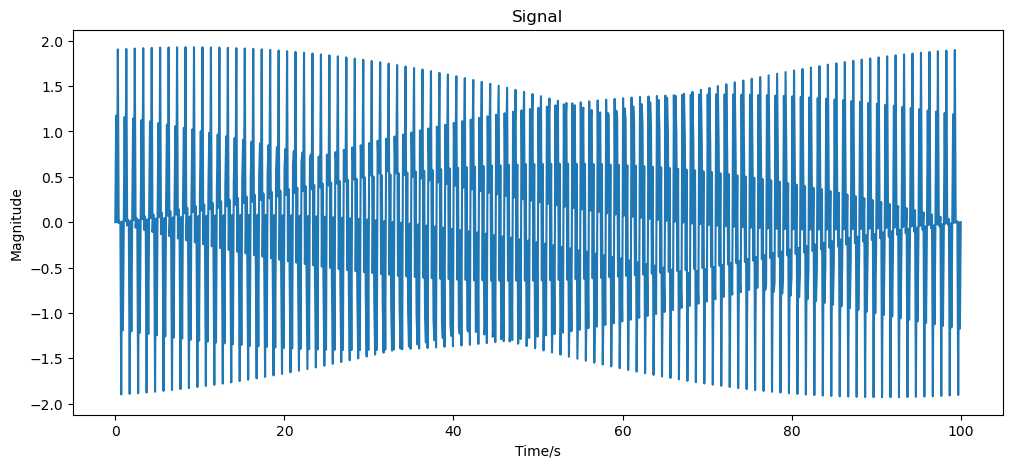

In [3]:
f1 = 4
f2 = 1

x_t = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)

print(f'Signal Frequency = {f1} Hz = {2*np.pi*f1 : .4f} rad/s')
print(f'Normalized frequency = {f1/fs}')

plt.figure(figsize=(12,5))
plt.plot(t,x_t)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

## Applying CWT

In [4]:
# Define Morlet Mother Wavelet

def morlet(t, w0=1):
    return np.exp(1j*w0*t)*np.exp(-0.5*t*t)

In [5]:
# Define Scale
SCALE = 16
SCALE_RES = 128
s = np.linspace(1, SCALE, SCALE_RES)

w0 = 2*np.pi*fs/2

t_, s_ = np.meshgrid(t, s, indexing='ij')

wav = np.conjugate(morlet((t_-T/2)/s_, w0=w0))/np.sqrt(s)

coeffs = np.trapz(x_t.reshape(-1,1)*wav, axis=0)

### Plot Coefficients vs Scale

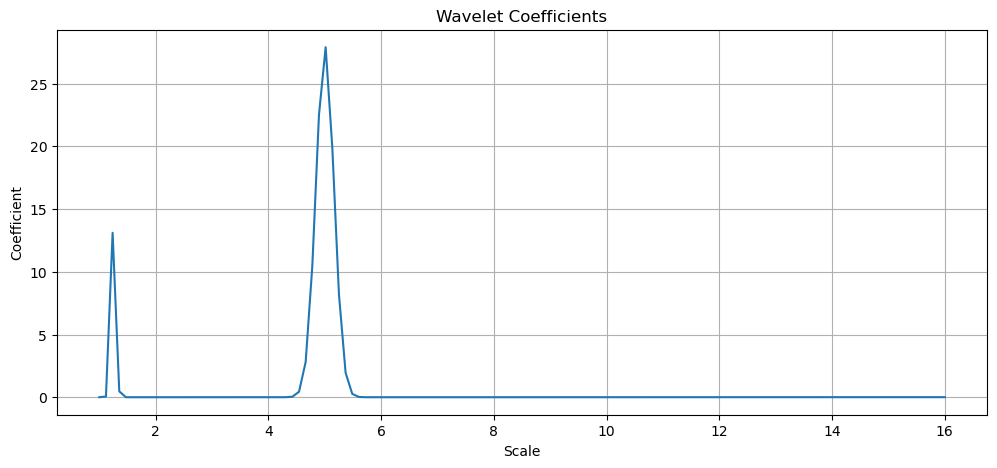

In [6]:
plt.figure(figsize=(12,5))
plt.plot(s, np.abs(coeffs))
plt.xlabel("Scale")
plt.ylabel("Coefficient")
plt.title("Wavelet Coefficients")
plt.grid()
plt.show()


### Plot Coefficients vs Freq

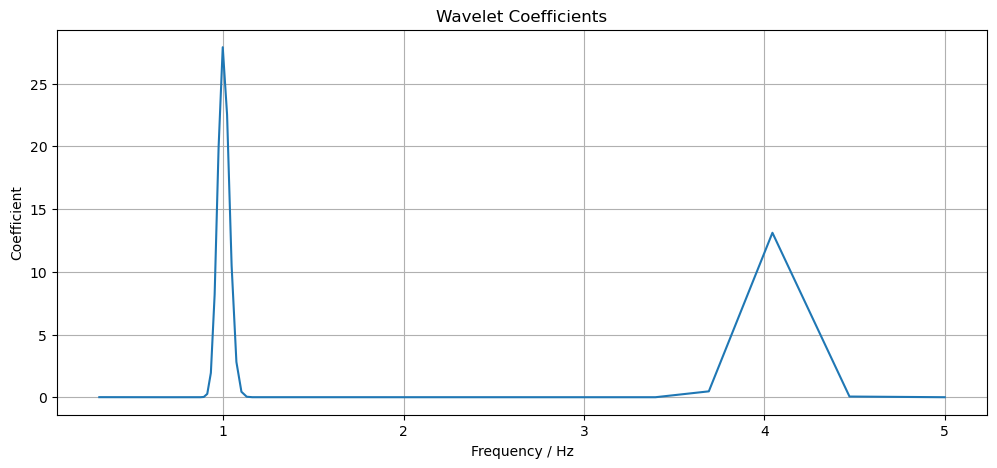

In [7]:
plt.figure(figsize=(12,5))
plt.plot(w0/(s*2*np.pi), np.abs(coeffs))
plt.xlabel("Frequency / Hz")
plt.ylabel("Coefficient")
plt.title("Wavelet Coefficients")
plt.grid()
plt.show()


### To obtain linear frequency resolution

In [8]:
# Define Scale
delta_f = (fs/2)/SCALE_RES
freq = np.linspace(delta_f, fs/2, SCALE_RES+1)

s = w0 / (2*np.pi*freq)

t_, s_ = np.meshgrid(t, s, indexing='ij')

wav = np.conjugate(morlet((t_-T/2)/s_, w0=w0))/np.sqrt(s)

coeffs = np.trapz(x_t.reshape(-1,1)*wav, axis=0)

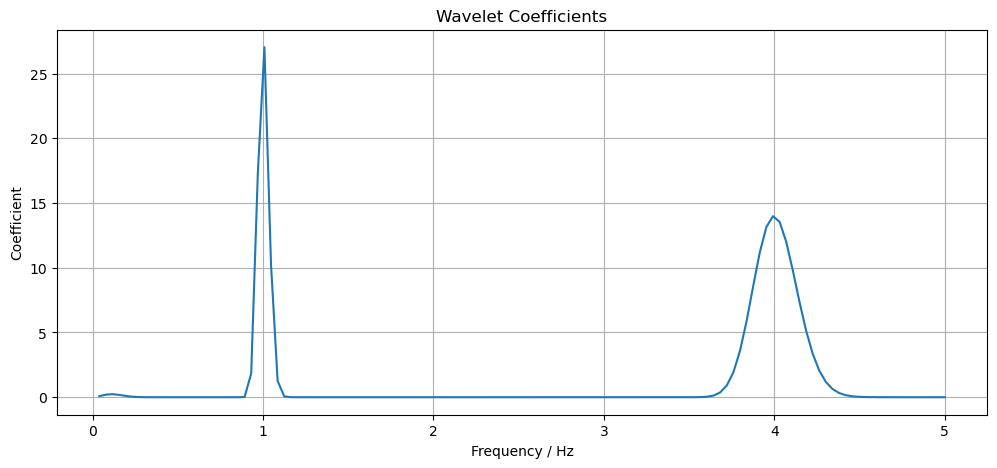

In [9]:
plt.figure(figsize=(12,5))
plt.plot(freq, np.abs(coeffs))
plt.xlabel("Frequency / Hz")
plt.ylabel("Coefficient")
plt.title("Wavelet Coefficients")
plt.grid()
plt.show()

## Non-Stationary Signal

In [10]:
f1 = 4
f2 = 1
f3 = 0.4
f4 = 2.5

t1 = T_points//4
t2 = T_points//2
t3 = 3*T_points//4

x_k = 0*t
x_k[0:t1] = np.sin(2*np.pi*f1*t[0:t1])
x_k[t1:t2] = np.sin(2*np.pi*f2*t[t1:t2])
x_k[t2:t3] = np.sin(2*np.pi*f3*t[t2:t3])
x_k[t3:] = np.sin(2*np.pi*f4*t[t3:])

print(f'w1 = {2*np.pi*f1}')
print(f'w2 = {2*np.pi*f2}')
print(f'w3 = {2*np.pi*f3}')
print(f'w4 = {2*np.pi*f4}')

w1 = 25.132741228718345
w2 = 6.283185307179586
w3 = 2.5132741228718345
w4 = 15.707963267948966


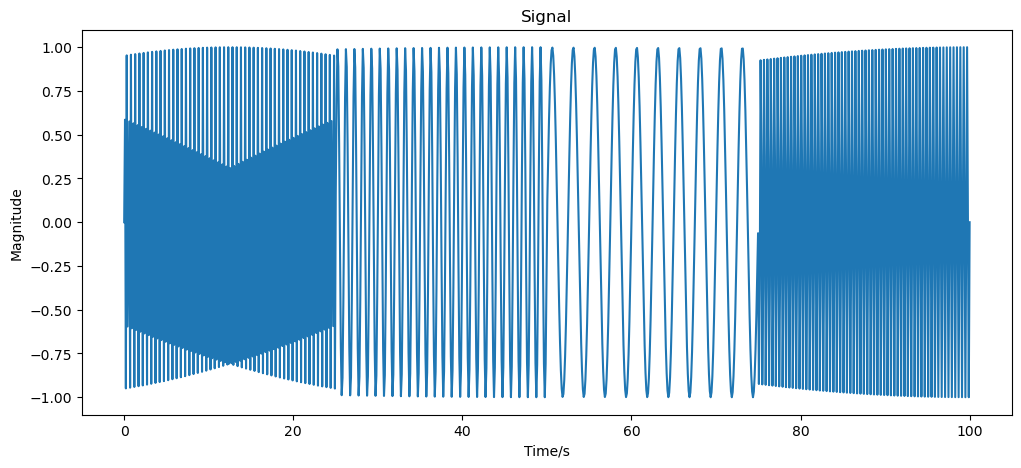

In [11]:
plt.figure(figsize=(12,5))
plt.plot(t, x_k)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

In [12]:
tau_points = 100
tau = np.linspace(0,T,tau_points)

tau_,s_,t_ = np.meshgrid(tau,s,t,indexing='ij')
print(s_.shape)

(100, 129, 1000)


In [13]:
wav = np.conjugate(morlet((t_ - tau_)/s_, w0=w0))
Sxx1 = np.trapz(x_k*wav, axis=2)/np.sqrt(s_[:,:,0])
print(Sxx1.shape)


(100, 129)


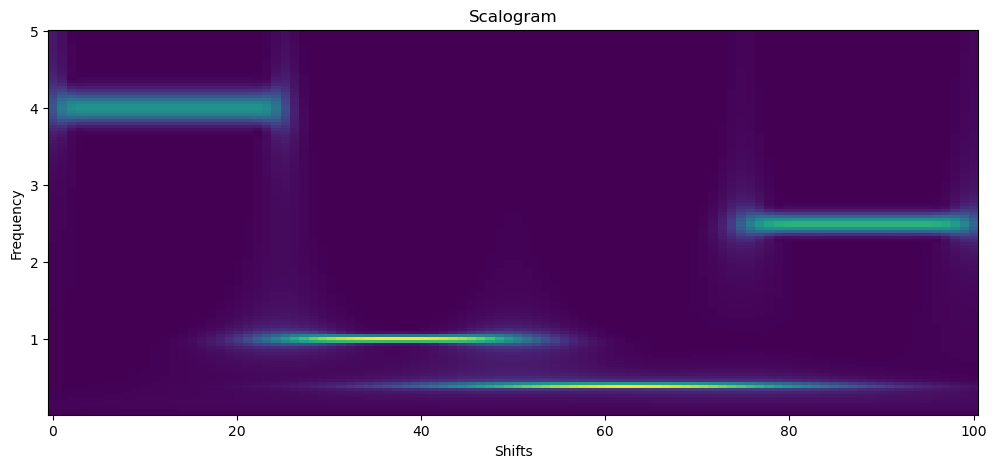

In [14]:
plt.figure(figsize=(12,5))
plt.title("Scalogram")
plt.pcolormesh(tau, freq, np.abs(Sxx1.T))
plt.xlabel("Shifts")
plt.ylabel("Frequency")
plt.show()

## Chirp Signal

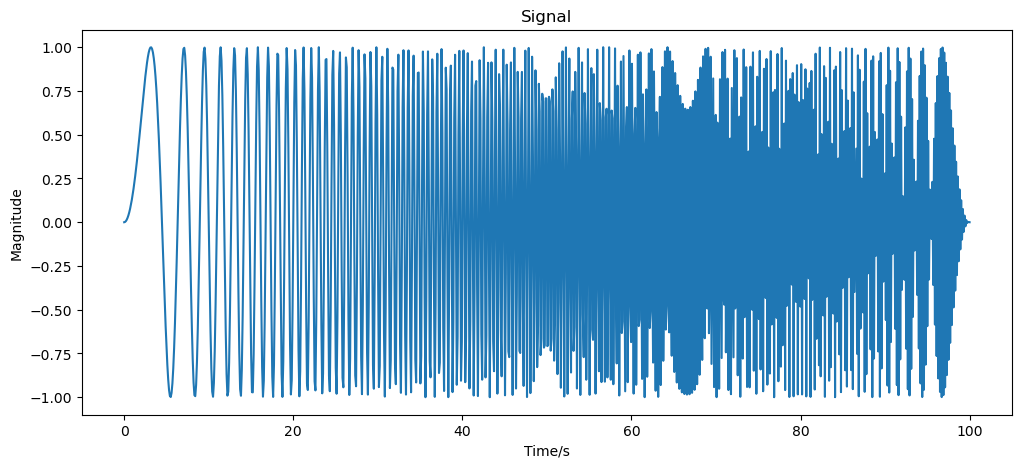

In [15]:
x_c = np.sin(2*np.pi*t*t/40)

plt.figure(figsize=(12,5))
plt.plot(t, x_c)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

### Generate CWT Map

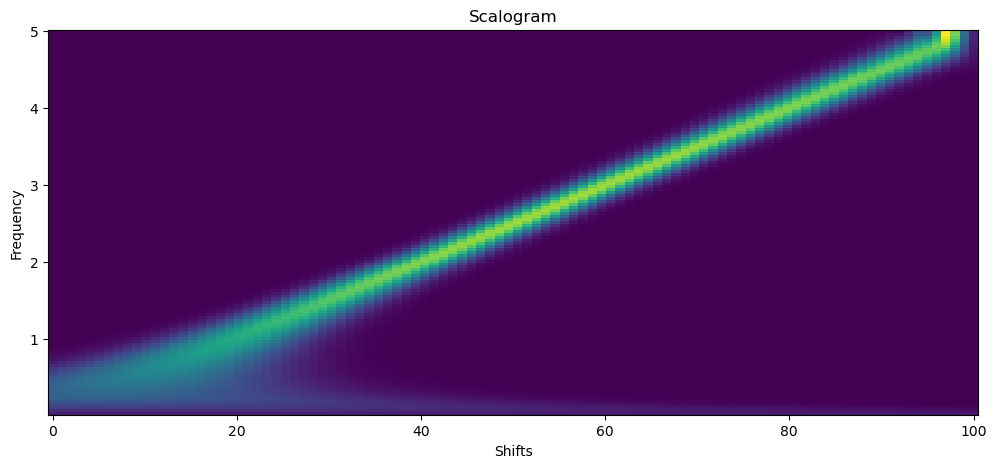

In [16]:
Sxx2 = np.trapz(x_c*wav, axis=2)/np.sqrt(s_[:,:,0])

plt.figure(figsize=(12,5))
plt.title("Scalogram")
plt.pcolormesh(tau, freq, np.abs(Sxx2.T))
plt.xlabel("Shifts")
plt.ylabel("Frequency")
plt.show()

## Using scipy.signal

In [17]:
import scipy.signal

### Difference in Morlet Function

Scipy calculates morlet using window width and sample numbers. Hence 's' needs to be scaled by 'fs'

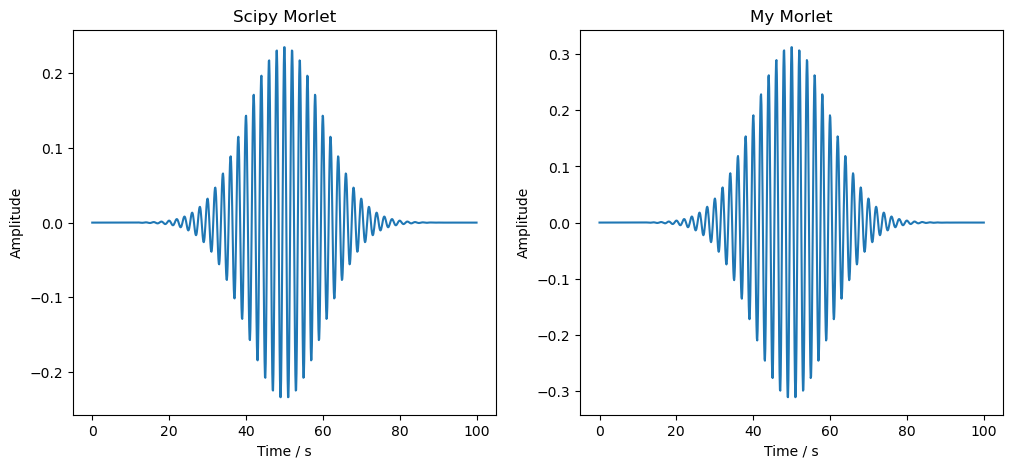

In [18]:
scal = 10

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
scipy_wav = np.sqrt(fs)*scipy.signal.morlet2(T_points, fs*scal, w0)
plt.plot(t,np.real(scipy_wav))
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title("Scipy Morlet")

plt.subplot(1,2,2)
plt.plot(t,np.real(morlet((t-T/2)/scal,w0=w0))/np.sqrt(scal))
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title("My Morlet")

plt.show()

### Scipy Scalogram

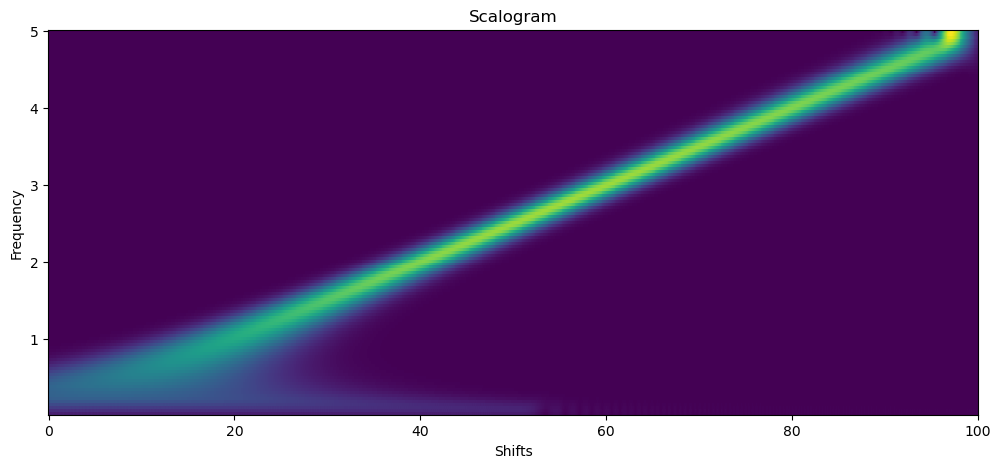

In [19]:
widths = s*fs

cwtm = scipy.signal.cwt(x_c, wavelet=scipy.signal.morlet2, widths=widths, w=w0)

plt.figure(figsize=(12,5))
plt.title("Scalogram")
plt.pcolormesh(t, freq, np.abs(cwtm))
plt.xlabel("Shifts")
plt.ylabel("Frequency")
plt.show()
plt.show()

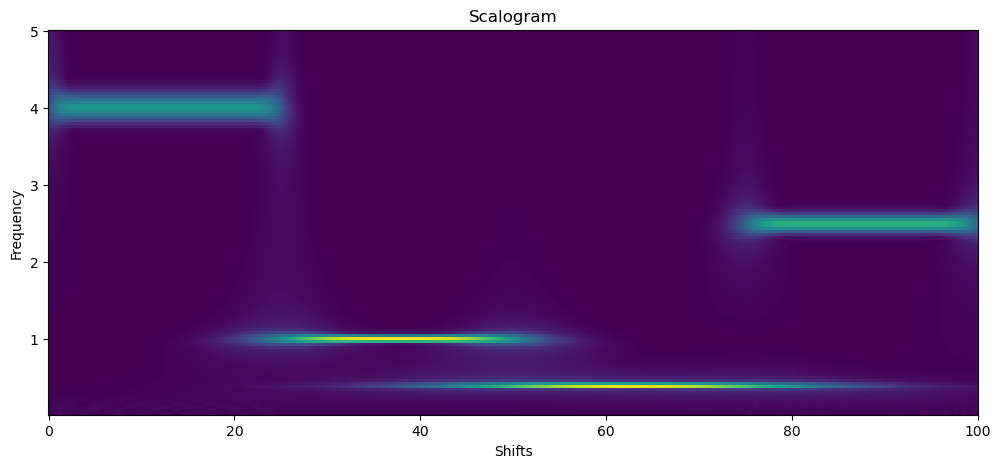

In [20]:
cwtm = scipy.signal.cwt(x_k, wavelet=scipy.signal.morlet2, widths=widths, w=w0)

plt.figure(figsize=(12,5))
plt.title("Scalogram")
plt.pcolormesh(t, freq, np.abs(cwtm))
plt.xlabel("Shifts")
plt.ylabel("Frequency")
plt.show()
plt.show()

### Comparing with Spectrogram

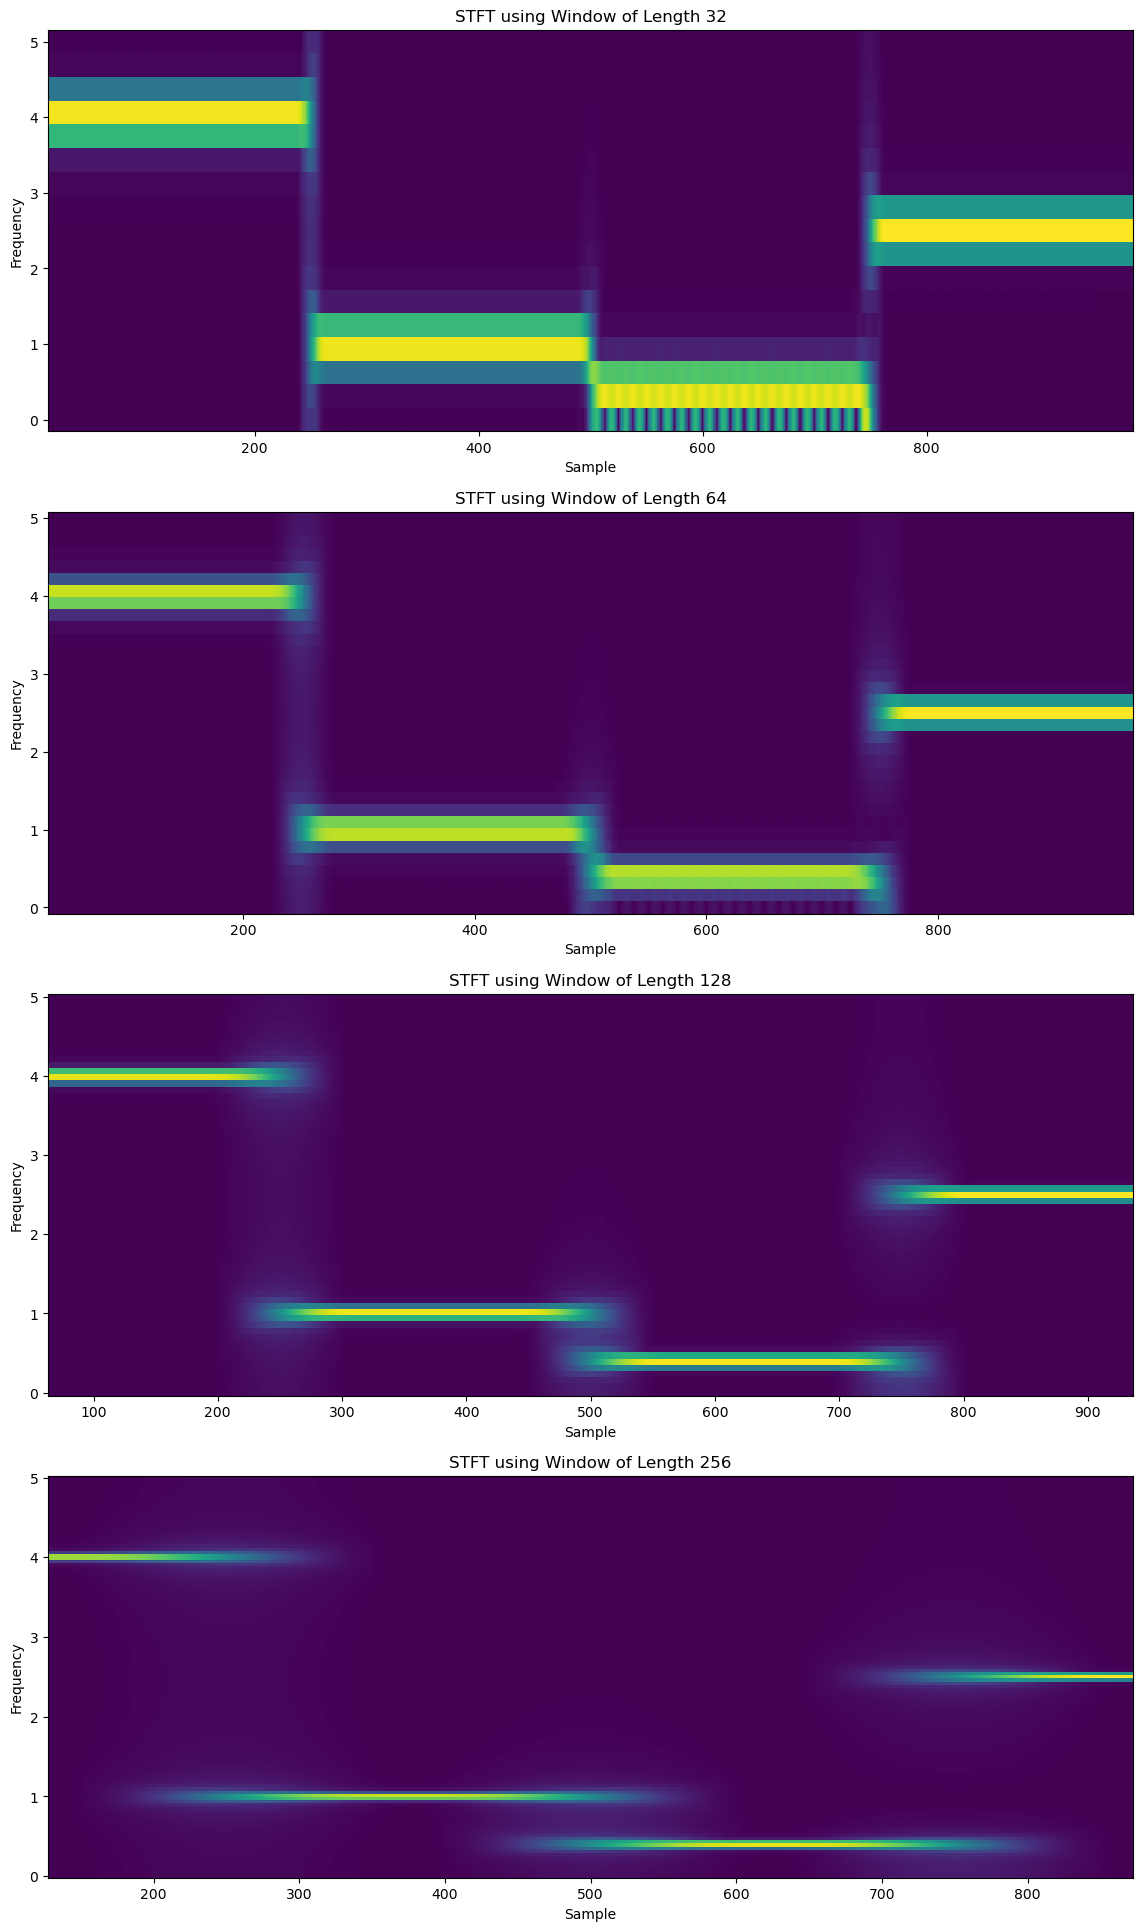

In [22]:
window_lengths = [32,64,128,256]

plt.figure(figsize=(14,6*len(window_lengths)))

for i in range(len(window_lengths)):
    window_length = window_lengths[i]
    f,t,Zxx = scipy.signal.stft(x_k,
                            window=scipy.signal.windows.hann(window_length),
                            nperseg=window_length,
                            noverlap=window_length-1, 
                            boundary=None, 
                            padded=False,  
                            scaling='spectrum')
    
    plt.subplot(len(window_lengths),1,i+1)
    plt.pcolormesh(t,fs*f,np.abs(Zxx))
    plt.xlabel("Sample")
    plt.ylabel("Frequency")
    plt.title(f'STFT using Window of Length {window_length}')